### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv('data/telco_churn_data.csv')

In [68]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [70]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


### Data Preprocessing

In [71]:
# drop the unnecessary columns and the target column
data = df.copy()
data = data.drop(['Customer ID','Churn Value','Total Long Distance Charges','Total Extra Data Charges', 'Total Refunds', 'Latitude', 'Longitude', 'Customer Satisfaction','Churn Reason','Churn Category','Internet Type', 'Offer'], axis = 1)
data.dropna(inplace=True)
data.drop(data.select_dtypes('object').columns.tolist(), axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Age                                7043 non-null   int64  
 7   Number of Dependents               7043 non-null   int64  
 8   Zip Code                           7043 non-null   int64  
 9   Population                         7043 non-null   int64  
 10  CLTV                               7043 non-null   int64  
 11  Total Customer Svc Requests        7043 non-null   int64

In [72]:
from pprint import pprint
for col in data.columns.tolist():
    pprint(f"++++++++++++++++++{col}++++++++++++++++++")
    pprint(f"{data[col].unique()} : {data[col].nunique()} : {data[col].dropna().shape[0]}")
    print()

'++++++++++++++++++Number of Referrals++++++++++++++++++'
'[ 0  1  6  2  4  3  7  5  8  9 10 11] : 12 : 7043'

'++++++++++++++++++Tenure in Months++++++++++++++++++'
('[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49\n'
 ' 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38\n'
 ' 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63] : '
 '72 : 7043')

'++++++++++++++++++Avg Monthly Long Distance Charges++++++++++++++++++'
'[ 0.   48.85 11.33 ... 44.99 44.98  8.62] : 3584 : 7043'

'++++++++++++++++++Avg Monthly GB Download++++++++++++++++++'
('[ 9 19 57 13 15 20 33 26 21 32 31 12 10  8 16  2 11  6 14  0 30 29 24 28\n'
 ' 23 22  7 18 25  4  3  5 27 58 17 53 75 56 52 76 64 45 63 62 78 80 84 65\n'
 ' 90 46 43 94 51 48 73 69 71 42 41 59 47 82 85] : 63 : 7043')

'++++++++++++++++++Monthly Charge++++++++++++++++++'
'[41.236 83.876 99.268 ... 72.    65.45  78.7  ] : 2298 : 7043'

'++++++++++++++++++Total Regular Charges++++++++++++

In [73]:
# encode the categorical columns, categorical data transformation to numerical
le=LabelEncoder()
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data.head()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Age,Number of Dependents,Zip Code,Population,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,1,0.00,9,41.236,39.65,78,0,90022,68701,5433,5,0
1,1,8,48.85,19,83.876,633.30,74,1,90063,55668,5302,5,0
2,0,18,11.33,57,99.268,1752.55,71,3,90065,47534,3179,1,0
3,1,25,19.76,13,102.440,2514.50,78,1,90303,27778,5337,1,1
4,1,37,6.33,15,79.560,2868.15,80,1,90602,26265,2793,1,0


In [74]:
#  scale the numeric columns inorder to maintain stability
scale=StandardScaler()
data_scaled=scale.fit_transform(data)

#only for visualization
#data_df=pd.DataFrame(data_scaled)
#data_df.head()

### PCA for Visualization

In [75]:
# creating 2D visualization
pca=PCA(n_components=3)
pc=pca.fit_transform(data_scaled)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2', 'principal component 3'])
pdf.rename(columns={'principal component 1':'Principal Component 1','principal component 2':'Principal Component 2', 'principal component 3':'Principal Component 3'}, inplace=True)
pdf.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,-2.038937,1.263751,0.654655
1,-0.792507,1.882067,0.672471
2,0.024591,0.567759,2.239503
3,0.359449,1.098254,-0.289568
4,-0.103774,0.175355,-0.141355


In [76]:
# target column
df_tar = df.copy()
df_tar = df_tar[['Churn Value']]
df_tar.rename(columns={'Churn Value':'Churn'}, inplace=True)
df_tar.value_counts()


Churn
0        5174
1        1869
Name: count, dtype: int64

In [77]:
data_plt=pd.concat([pdf,df_tar],axis=1)
data_plt.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Churn
0,-2.038937,1.263751,0.654655,1
1,-0.792507,1.882067,0.672471,1
2,0.024591,0.567759,2.239503,1
3,0.359449,1.098254,-0.289568,1
4,-0.103774,0.175355,-0.141355,1


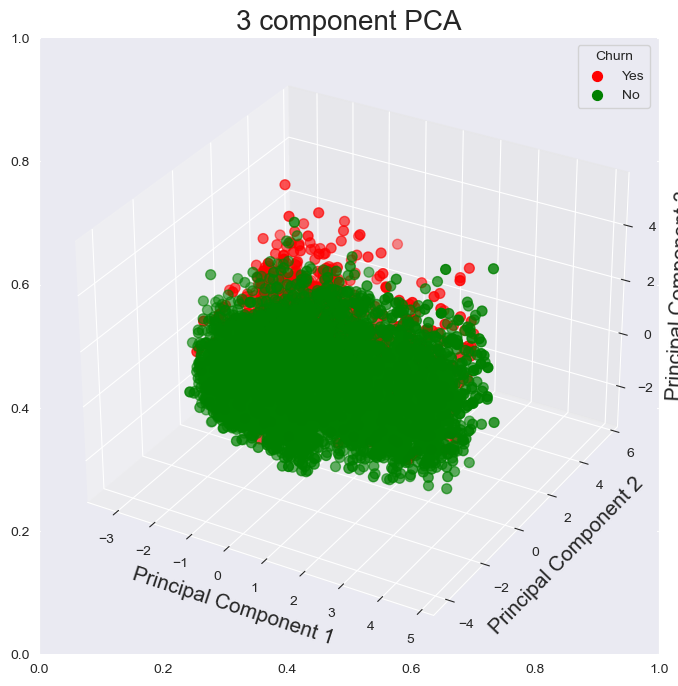

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax = plt.axes(projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Yes', 'No']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data_plt['Churn'].apply(lambda x: 'Yes' if x ==1 else 'No') == target
    ax.scatter3D(data_plt.loc[indicesToKeep, 'Principal Component 1']
                 , data_plt.loc[indicesToKeep, 'Principal Component 2']
                 , data_plt.loc[indicesToKeep, 'Principal Component 3']
                 , c = color
                 , s = 50)
ax.legend(targets, title='Churn')
ax.grid()

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

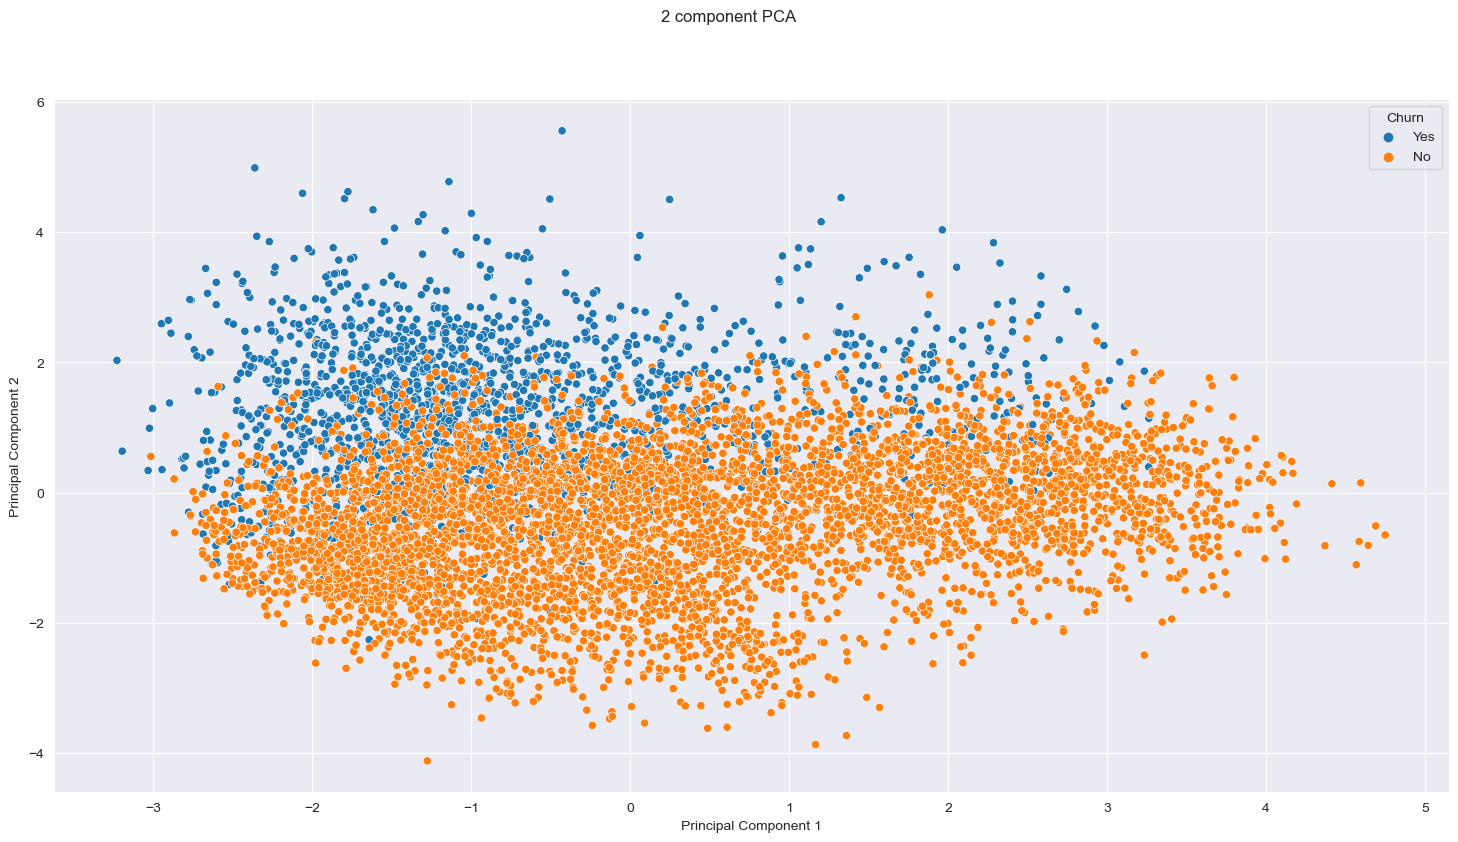

In [93]:
fig, axes = plt.subplots(1, 1, figsize=(18, 9))
fig.suptitle('2 component PCA')
sns.scatterplot(data=data_plt, x='Principal Component 1', y='Principal Component 2', hue=data_plt['Churn'].apply(lambda x: 'Yes' if x == 1 else 'No'))


### Components Exploration

<Axes: xlabel='Number of Clusters'>

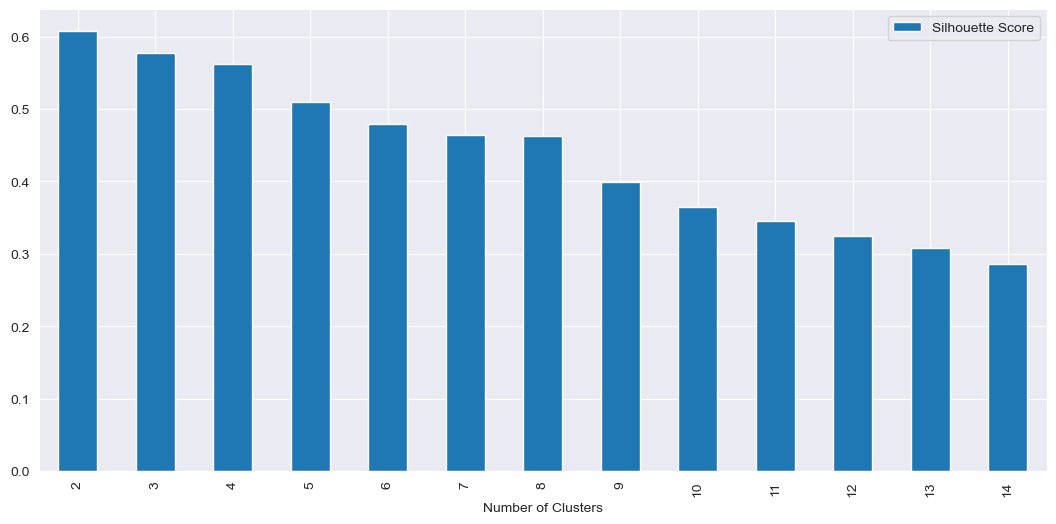

In [80]:
score_list=[]
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score (data, preds, metric='euclidean')
    score_list.append(score)
    #print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
pd_plt = pd.DataFrame(score_list,range(2,15)).reset_index()
pd_plt.rename(columns={'index':'Number of Clusters',0:'Silhouette Score'}, inplace=True)
pd_plt.plot(kind='bar', x='Number of Clusters', y='Silhouette Score')


### Elbow method

In [81]:
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(data_scaled)

In [82]:
## Determine the best value for k
inertia = np.array([])
k_vals = range(1,15)

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(components)
    kmeans.fit(data_scaled)
    inertia = np.append(inertia, kmeans.inertia_)

inertia_vals = pd.DataFrame(inertia, index=k_vals, columns=['Inertia'])

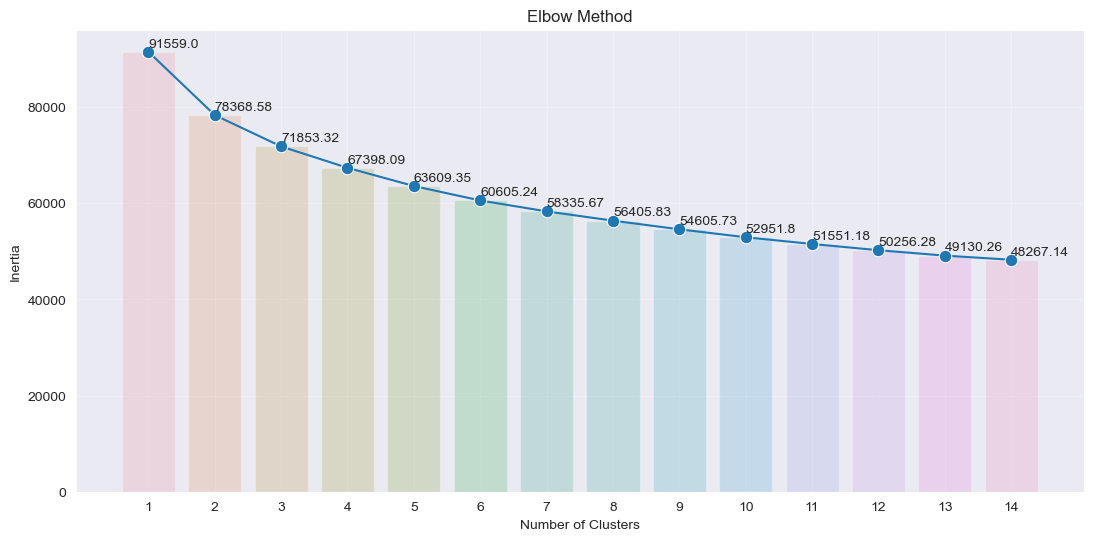

In [83]:
import matplotlib.pyplot as plt10
from importlib import reload
plt=reload(plt10)
plt10.rcParams['figure.figsize'] = (13,6)
plt10.rcParams['figure.max_open_warning'] = False
sns.barplot(x=inertia_vals.index, y=inertia_vals.Inertia, alpha=0.25)
sns.lineplot(x=inertia_vals.index-1, y=inertia_vals.Inertia, marker='o', markersize=9, legend=False)
plt10.title('Elbow Method')
plt10.xticks(inertia_vals.index-1)
plt10.xlabel('Number of Clusters')
plt10.ylabel('Inertia')
for i in inertia_vals.index:
    plt10.text(
        x=i-1,
        y=inertia_vals.Inertia[i]+1000,
        s=round(inertia_vals.Inertia[i], 2)
    )
plt10.grid(alpha=0.25)

In [84]:
# two components but four components explain good percentage data
model=KMeans(n_clusters=3)
model.fit(data)
print(model.labels_)

[0 0 0 ... 1 1 2]


In [85]:
target=pd.DataFrame(model.labels_,columns=['target'])
data_plt_km=pd.concat([pdf,target],axis=1)
data_plt_km.head()

,Principal Component 1,Principal Component 2,Principal Component 3,target
0,-2.038937,1.263751,0.654655,0
1,-0.792507,1.882067,0.672471,0
2,0.024591,0.567759,2.239503,0
3,0.359449,1.098254,-0.289568,2
4,-0.103774,0.175355,-0.141355,2


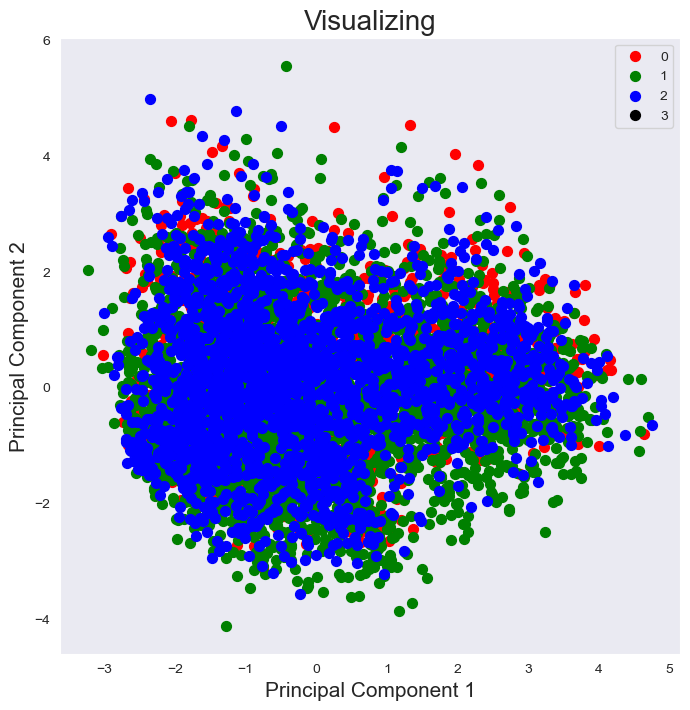

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualizing', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = data_plt_km['target'] == target
    ax.scatter(data_plt_km.loc[indicesToKeep, 'Principal Component 1']
               , data_plt_km.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

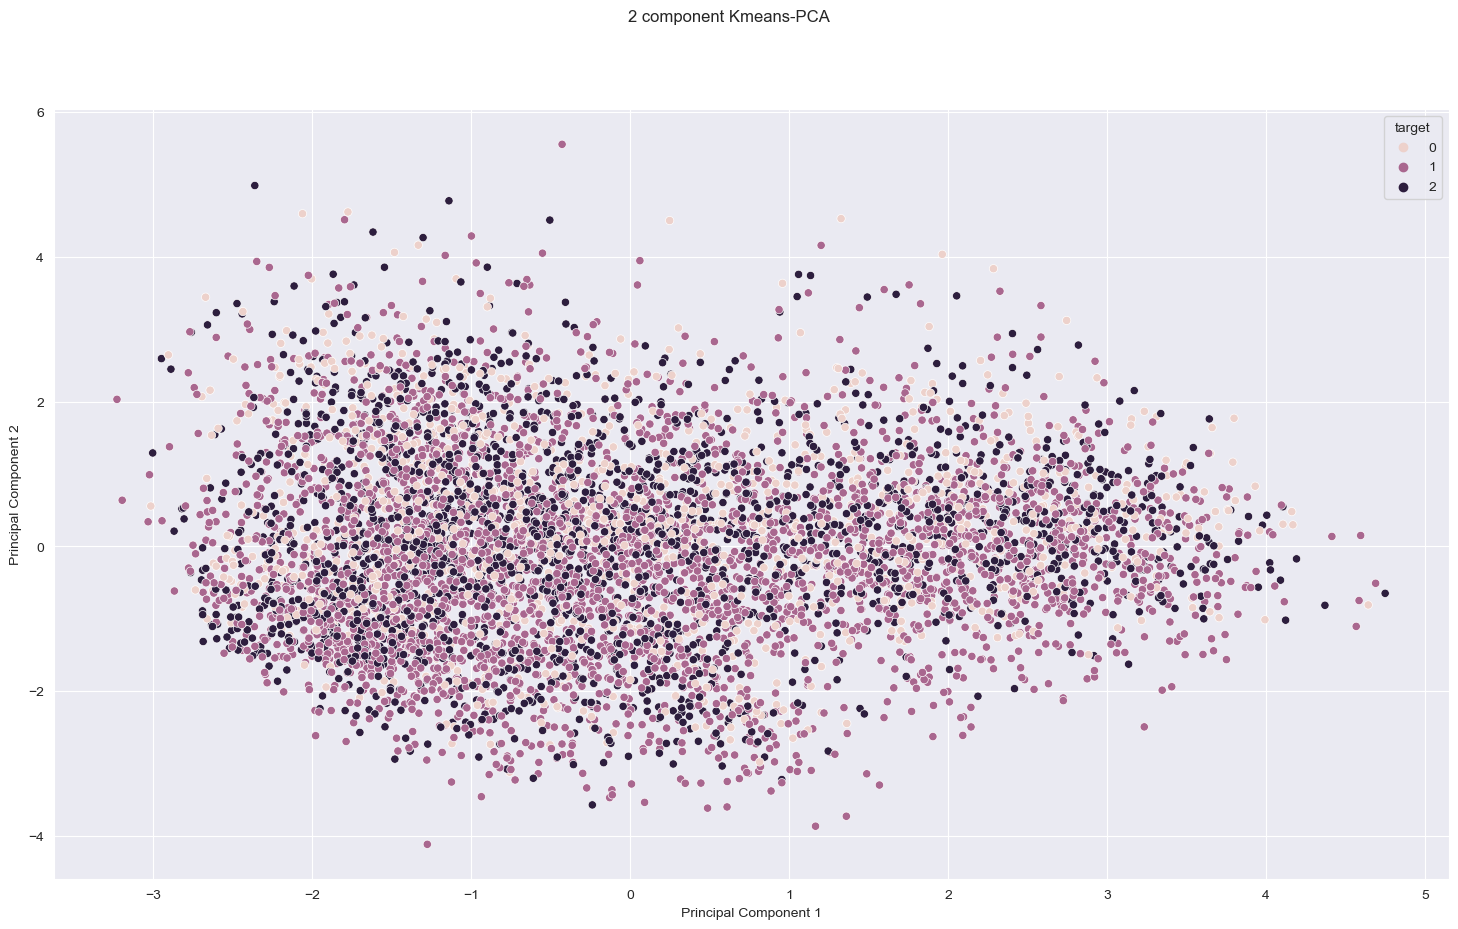

In [87]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
fig.suptitle('2 component Kmeans-PCA')
sns.scatterplot(data=data_plt_km, x='Principal Component 1', y='Principal Component 2', hue=data_plt_km['target'])

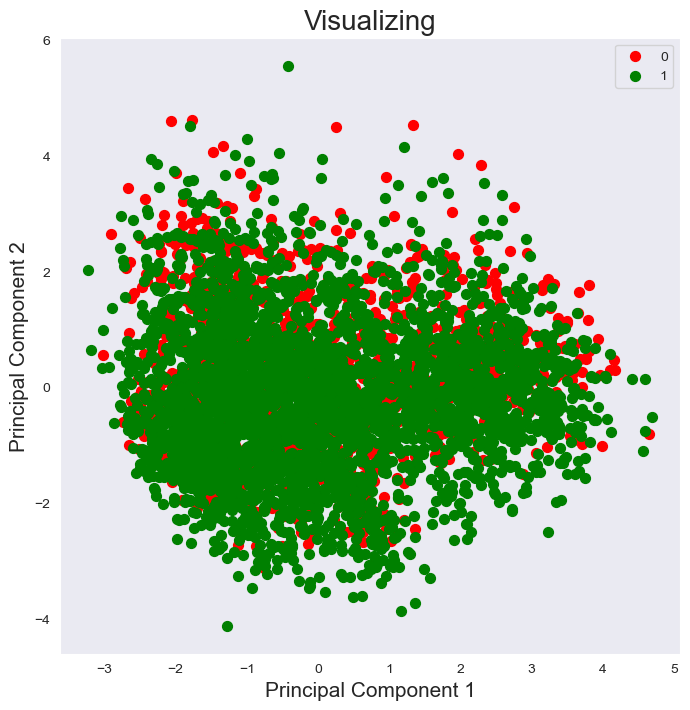

In [88]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('Visualizing', fontsize = 20)
targets = [0,1]
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = data_plt_km['target'] == target
    ax.scatter(data_plt_km.loc[indicesToKeep, 'Principal Component 1']
                 , data_plt_km.loc[indicesToKeep, 'Principal Component 2']
                 
                 , c = color
                 , s = 50)
ax.legend(targets)
ax.grid()

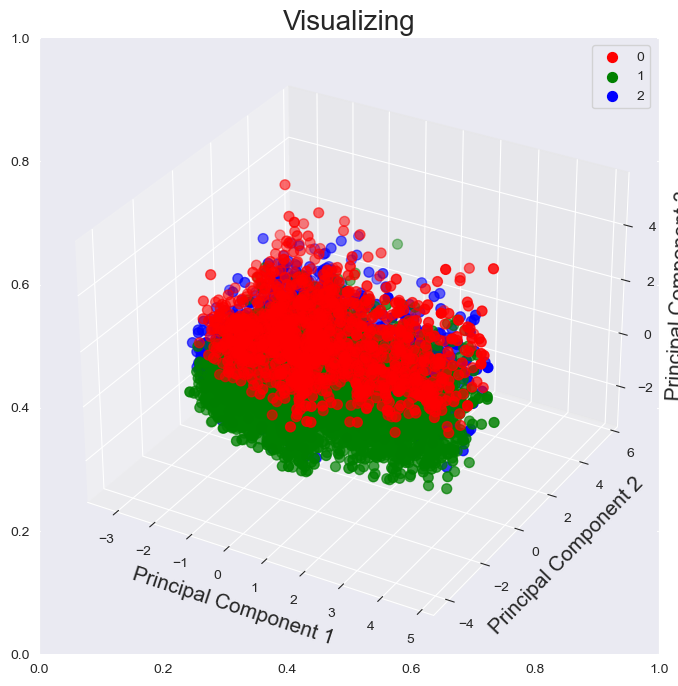

In [89]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax = plt.axes(projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Visualizing', fontsize = 20)
targets = [0,1,2,]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data_plt_km['target'] == target
    ax.scatter3D(data_plt_km.loc[indicesToKeep, 'Principal Component 1']
               , data_plt_km.loc[indicesToKeep, 'Principal Component 2']
               , data_plt_km.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

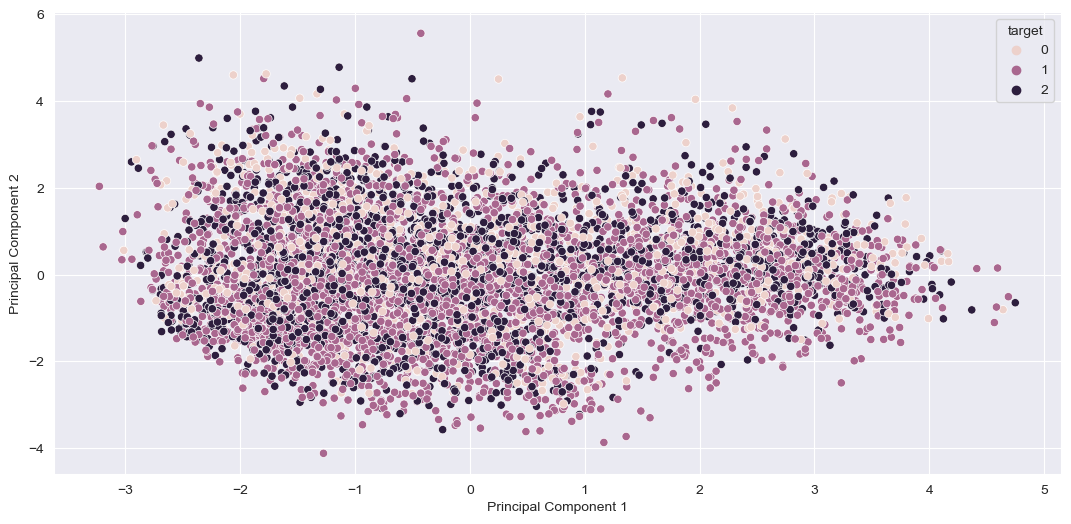

In [90]:
sns.scatterplot(data=data_plt_km, x='Principal Component 1', y='Principal Component 2', hue='target')